**GITHUB:** 

https://github.com/PUCP-DA2020-ML/Default-CreditCard

###############################################################################
# **1. COMPRENSIÓN DEL NEGOCIO**
###############################################################################

### Dataset

Usaremos el dataset de **DEFAULT CREDIT CARD CLIENTS**, el cual está disponible en:
<br/>
<br/>
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
<br/>
<br/>
El objetivo será predecir si el crédito de un cliente caerá en incumplimiento de pago.

**Descripción de los datos:**

>Nro | Variable | Tipo_Variable | Descripción | Dominio
>--- | --- | --- | --- | ---
>1 | LIMIT_BAL (X1) | Numérica (Continua) | Monto del crédito otorgado (NT dollar) | 
>2 | SEX (X2) | Categórica (Nominal) | Género | (1 = masculino; 2 = femenino)
>3 | EDUCATION (X3) | Categórica (Ordinal) | Educación | (1 = escuela de posgrado; 2 = universidad; 3 = secundaria; 4 = otros).
>4 | MARRIAGE (X4) | Categórica (Nominal) | Estado Civil | (1 = casado; 2 = soltero; 3 = otros)
>5 | AGE (X5) | Numérica (Discreta) | Edad (Años) | 
>6 | PAY_0 (X6) | Categórica (Ordinal) | El estado de reembolso en Setiembre del 2005 | (-1 = pago al día; 1 = 1 mes de retraso en el pago; 2 = 2 meses de retraso en el pago; . . .; 8 = 8 meses de retraso en el pago; 9 = 9 meses o más de retraso en el pago)
>7 | PAY_2 (X7) | Categórica (Ordinal) | El estado de reembolso en Agosto del 2005 | (-1 = pago al día; 1 = 1 mes de retraso en el pago; 2 = 2 meses de retraso en el pago; . . .; 8 = 8 meses de retraso en el pago; 9 = 9 meses o más de retraso en el pago)
>8 | PAY_3 (X8) | Categórica (Ordinal) | El estado de reembolso en Julio del 2005 | (-1 = pago al día; 1 = 1 mes de retraso en el pago; 2 = 2 meses de retraso en el pago; . . .; 8 = 8 meses de retraso en el pago; 9 = 9 meses o más de retraso en el pago)
>9 | PAY_4 (X9) | Categórica (Ordinal) | El estado de reembolso en Junio del 2005 | (-1 = pago al día; 1 = 1 mes de retraso en el pago; 2 = 2 meses de retraso en el pago; . . .; 8 = 8 meses de retraso en el pago; 9 = 9 meses o más de retraso en el pago)
>10 | PAY_5 (X10) | Categórica (Ordinal) | El estado de reembolso en Mayo del 2005 | (-1 = pago al día; 1 = 1 mes de retraso en el pago; 2 = 2 meses de retraso en el pago; . . .; 8 = 8 meses de retraso en el pago; 9 = 9 meses o más de retraso en el pago)
>11 | PAY_6 (X11) | Categórica (Ordinal) | El estado de reembolso en Abril del 2005 | (-1 = pago al día; 1 = 1 mes de retraso en el pago; 2 = 2 meses de retraso en el pago; . . .; 8 = 8 meses de retraso en el pago; 9 = 9 meses o más de retraso en el pago)
>12 | BILL_AMT1 (X12) | Numérica (Continua) | Monto del estado de cuenta en Setiembre del 2005 (NT dollar) | 
>13 | BILL_AMT2 (X13) | Numérica (Continua) | Monto del estado de cuenta en Agosto del 2005 (NT dollar) | 
>14 | BILL_AMT3 (X14) | Numérica (Continua) | Monto del estado de cuenta en Julio del 2005 (NT dollar) | 
>15 | BILL_AMT4 (X15) | Numérica (Continua) | Monto del estado de cuenta en Junio del 2005 (NT dollar) | 
>16 | BILL_AMT5 (X16) | Numérica (Continua) | Monto del estado de cuenta en Mayo del 2005 (NT dollar) | 
>17 | BILL_AMT6 (X17) | Numérica (Continua) | Monto del estado de cuenta en Abril del 2005 (NT dollar) | 
>18 | PAY_AMT1 (X18) | Numérica (Continua) | Monto pagado en Setiembre del 2005 (NT dollar) | 
>19 | PAY_AMT2 (X19) | Numérica (Continua) | Monto pagado en Agosto del 2005 (NT dollar) | 
>20 | PAY_AMT3 (X20) | Numérica (Continua) | Monto pagado en Julio del 2005 (NT dollar) | 
>21 | PAY_AMT4 (X21) | Numérica (Continua) | Monto pagado en Junio del 2005 (NT dollar) | 
>22 | PAY_AMT5 (X22) | Numérica (Continua) | Monto pagado en Mayo del 2005 (NT dollar) | 
>23 | PAY_AMT6 (X23) | Numérica (Continua) | Monto pagado en Abril del 2005 (NT dollar) | 
>24 | DEFAULT_PAYMENT_NEXT_MONTH (Y) | Categórica (Nominal binaria) | Incumplimiento de pago del crédito como variable objetivo o respuesta | (Si = 1, No = 0)

###############################################################################
# **2. COMPRENSIÓN DE LOS DATOS**
###############################################################################

In [2]:
!pip install funpymodeling

     |████████████████████████████████| 225kB 4.9MB/s 
  Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


### Importación de Librerías

In [30]:
# Importando librerias
import pandas as pd
#import graphviz
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from pandas_profiling import ProfileReport
from funpymodeling.exploratory import profiling_num, freq_tbl, status, cat_vars, num_vars
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from pprint import pprint
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

## **IMPORTACIÓN DE DATOS** (datasets)

In [ ]:
#from google.colab import files
#subido = files.upload()
#import io
#df = pd.read_excel(io.BytesIO(subido['default_of_credit_card_clients.xls']), header =1)
#df = pd.read_excel('default_of_credit_card_clients.xls', header =1)

Saving default_of_credit_card_clients.xls to default_of_credit_card_clients.xls


In [4]:
#Importación del dataset
df_defcredcard = pd.read_csv('https://raw.githubusercontent.com/PUCP-DA2020-ML/Default-CreditCard/main/default-of-credit-card-clients.csv', sep=';')

In [5]:
#Tamaño del dataset (registros, variables)
df_defcredcard.shape

(30000, 25)

In [6]:
#Muestra (5 registros) del dataset
df_defcredcard.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
# Eliminar columna de correlativo
df_defcredcard.drop(['ID'], axis=1, inplace=True)

## **ANÁLISIS EXPLORATORIO DE DATOS (AED)**

In [9]:
target = 'default_payment_next_month'
predictors = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [10]:
df_defcredcard["SEX"] = df_defcredcard["SEX"].astype(str)
df_defcredcard["EDUCATION"] = df_defcredcard["EDUCATION"].astype(str)
df_defcredcard["MARRIAGE"] = df_defcredcard["MARRIAGE"].astype(str)
df_defcredcard["PAY_0"] = df_defcredcard["PAY_0"].astype(str)
df_defcredcard["PAY_2"] = df_defcredcard["PAY_2"].astype(str)
df_defcredcard["PAY_3"] = df_defcredcard["PAY_3"].astype(str)
df_defcredcard["PAY_4"] = df_defcredcard["PAY_4"].astype(str)
df_defcredcard["PAY_5"] = df_defcredcard["PAY_5"].astype(str)
df_defcredcard["PAY_6"] = df_defcredcard["PAY_6"].astype(str)
df_defcredcard["default_payment_next_month"] = df_defcredcard["default_payment_next_month"].astype(str)

### ***Resumen Descriptivo***

In [ ]:
#------------------------------------------------
# ANÁLISIS DE EXPLORACIÓN RÁPIDA O INICIAL
#------------------------------------------------
#from pandas_profiling import ProfileReport
#ProfileReport(df_defcredcard, minimal=True)

In [11]:
#------------------------------------------------
# TIPOS DE DATOS
#------------------------------------------------
df_defcredcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  int64 
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  int64 
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                       30000 non-null  object
 8   PAY_4                       30000 non-null  object
 9   PAY_5                       30000 non-null  object
 10  PAY_6                       30000 non-null  object
 11  BILL_AMT1                   30000 non-null  int64 
 12  BILL_AMT2                   30000 non-null  int64 
 13  BILL_AMT3                   30000 non-null  in

In [16]:
#--------------------------------------------------------------
# RESUMEN DESCRIPTIVO
#--------------------------------------------------------------
#df_defcredcard.describe(include='all').T
profiling_num(df_defcredcard)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,LIMIT_BAL,167484.322667,129747.661567,0.774685,10000.00,20000.0,50000.00,140000.0,240000.00,430000.00,500000.00
1,AGE,35.485500,9.217904,0.259765,22.00,23.0,28.00,34.0,41.00,53.00,60.00
2,BILL_AMT1,51223.330900,73635.860576,1.437545,-81.00,0.0,3558.75,22381.5,67091.00,201203.05,350110.68
3,BILL_AMT2,49179.075167,71173.768783,1.447237,-200.00,0.0,2984.75,21200.0,64006.25,194792.20,337495.28
4,BILL_AMT3,47013.154800,69349.387427,1.475106,-200.00,0.0,2666.25,20088.5,60164.75,187821.05,325030.39
5,BILL_AMT4,43262.948967,64332.856134,1.487020,-212.02,0.0,2326.75,19052.0,54506.00,174333.35,304997.27
6,BILL_AMT5,40311.400967,60797.155770,1.508188,-232.01,0.0,1763.00,18104.5,50190.50,165794.30,285868.33
7,BILL_AMT6,38871.760400,59554.107537,1.532066,-331.03,0.0,1256.00,17071.0,49198.25,161912.00,279505.06
8,PAY_AMT1,5663.580500,16563.280354,2.924525,0.00,0.0,1000.00,2100.0,5006.00,18428.20,66522.18
9,PAY_AMT2,5921.163500,23040.870402,3.891274,0.00,0.0,833.00,2009.0,5000.00,19004.35,76651.02


Comentario:
- Hay variables con rangos mas grandes que otras, por lo que se debe escalar los valores para que el grado en el que afectarán a la variable objetivo podría ser igual y evitar sesgos hacia variables con un rango mayor.

#### Revisión de Valores Únicos y Valores Perdidos (Missings Values)

In [14]:
#--------------------------------------------------------------------------------------------------
# TABLA DE ESTADO DE LAS VARIABLES (Valores Nulos / Valores Únicos / Valores Perdidos / Ceros )
#--------------------------------------------------------------------------------------------------
status(df_defcredcard)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,LIMIT_BAL,0,0.0,0,0.000000,81,int64
1,SEX,0,0.0,0,0.000000,2,object
2,EDUCATION,0,0.0,0,0.000000,7,object
3,MARRIAGE,0,0.0,0,0.000000,4,object
4,AGE,0,0.0,0,0.000000,56,int64
5,PAY_0,0,0.0,0,0.000000,11,object
6,PAY_2,0,0.0,0,0.000000,11,object
7,PAY_3,0,0.0,0,0.000000,11,object
8,PAY_4,0,0.0,0,0.000000,11,object
9,PAY_5,0,0.0,0,0.000000,10,object


##### Valores Únicos

In [17]:
#--------------------------------------------------
# Cantidad de Valores Únicos
#--------------------------------------------------
# df_defcredcard.nunique()

In [ ]:
#--------------------------------------------------
# Valores Únicos por Columnas
#--------------------------------------------------
for columna in df_defcredcard.columns:
    print(f'Valores únicos de la columna {columna}: {(df_defcredcard[columna].unique())}')

Valores únicos de la columna LIMIT_BAL: [  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
Valores únicos de la columna SEX: [2 1]
Valores únicos de la columna EDUCATION: [2 1 3 5 4 6 0]
Valores únicos de la columna MARRIAGE: [1 2 3 0]
Valores únicos de la columna AGE: [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 6

Comentario: 
- La variable EDUCATION tienen categorías adicionales a lo definido en el diccionario (0, 5, 6)
- La variable MARRIAGE tiene una categoría adicional a lo definido en el diccionario (0)
- Las variables de historial de pago pasado (PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6) tienen valores adicionales a lo definido en el el diccionario ('0' y'-2'), que son ambiguos. Quizás '0' y '-2' se refieren también al pago al día o incluso pago antes de la fecha límite.

In [ ]:
#--------------------------------------------------
# % de Valores Únicos
#--------------------------------------------------
(df_defcredcard.nunique()/len(df_defcredcard))*100

LIMIT_BAL                      0.270000
SEX                            0.006667
EDUCATION                      0.023333
MARRIAGE                       0.013333
AGE                            0.186667
PAY_0                          0.036667
PAY_2                          0.036667
PAY_3                          0.036667
PAY_4                          0.036667
PAY_5                          0.033333
PAY_6                          0.033333
BILL_AMT1                     75.743333
BILL_AMT2                     74.486667
BILL_AMT3                     73.420000
BILL_AMT4                     71.826667
BILL_AMT5                     70.033333
BILL_AMT6                     68.680000
PAY_AMT1                      26.476667
PAY_AMT2                      26.330000
PAY_AMT3                      25.060000
PAY_AMT4                      23.123333
PAY_AMT5                      22.990000
PAY_AMT6                      23.130000
default_payment_next_month     0.006667
dtype: float64

Comentario:

No hay variables que tengan un alto porcentaje de valores únicos (referencia: 70-80%)

In [ ]:
por_val_unicos = pd.DataFrame(data = df_defcredcard.nunique()/len(df_defcredcard), columns=['Por_Val_Unico'])
por_val_unicos[por_val_unicos['Por_Val_Unico'] > 0.80].count()

Por_Val_Unico    0
dtype: int64

##### Valores Perdidos (Missings Values)

In [18]:
#--------------------------------------------
# Cantidad de Valores Nulos
#--------------------------------------------
# df_defcredcard.isna().sum()

In [19]:
#--------------------------------------------
# % de Valores Nulos
#--------------------------------------------
# (df_defcredcard.isna().sum()/len(df_defcredcard))*100

Comentario:
- No hay registros (filas) ni variables (columnas) que tengan valores nulos

### ***Análisis Univariado***

In [24]:
#--------------------------------------------
# TIPO DE VARIABLES
#--------------------------------------------
#from funpymodeling.exploratory import cat_vars, num_vars
print("Variables Categóricas: ", cat_vars(df_defcredcard))
print("Variables Numéricas: ", num_vars(df_defcredcard))

Variables Categóricas:  Index(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'default_payment_next_month'],
      dtype='object')
Variables Numéricas:  Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')


#### Análisis de Variables Categóricas

In [20]:
#--------------------------------------------
# TABLAS DE FRECUENCIAS
#--------------------------------------------
freq_tbl(df_defcredcard)
#freq_tbl(df_defcredcard['default_payment_next_month'])

  SEX  frequency  percentage  cumulative_perc
0   2      18112    0.603733         0.603733
1   1      11888    0.396267         1.000000

----------------------------------------------------------------

  EDUCATION  frequency  percentage  cumulative_perc
0         2      14030    0.467667         0.467667
1         1      10585    0.352833         0.820500
2         3       4917    0.163900         0.984400
3         5        280    0.009333         0.993733
4         4        123    0.004100         0.997833
5         6         51    0.001700         0.999533
6         0         14    0.000467         1.000000

----------------------------------------------------------------

  MARRIAGE  frequency  percentage  cumulative_perc
0        2      15964    0.532133         0.532133
1        1      13659    0.455300         0.987433
2        3        323    0.010767         0.998200
3        0         54    0.001800         1.000000

--------------------------------------------------------

In [21]:
#---------------------------------------------------------------------------------
# Tabla de Contingencia de Variable SEX
#---------------------------------------------------------------------------------
#pd.DataFrame({'Cantidad': df_defcredcard['SEX'].value_counts(), '%': df_defcredcard['SEX'].value_counts(normalize=True) * 100})

#---------------------------------------------------------------------------------
# Tabla de Contingencia de Variable EDUCATION
#---------------------------------------------------------------------------------
# pd.DataFrame({'Cantidad': df_defcredcard['EDUCATION'].value_counts(), '%': df_defcredcard['EDUCATION'].value_counts(normalize=True) * 100})

#---------------------------------------------------------------------------------
# Tabla de Contingencia de Variable MARRIAGE
#---------------------------------------------------------------------------------
# pd.DataFrame({'Cantidad': df_defcredcard['MARRIAGE'].value_counts(), '%': df_defcredcard['MARRIAGE'].value_counts(normalize=True) * 100})

#---------------------------------------------------------------------------------
# Tabla de Contingencia de Variable PAY_0
#---------------------------------------------------------------------------------
# pd.DataFrame({'Cantidad': df_defcredcard['PAY_0'].value_counts(), '%': df_defcredcard['PAY_0'].value_counts(normalize=True) * 100})

#---------------------------------------------------------------------------------
# Tabla de Contingencia de Variable PAY_2
#---------------------------------------------------------------------------------
# pd.DataFrame({'Cantidad': df_defcredcard['PAY_2'].value_counts(), '%': df_defcredcard['PAY_2'].value_counts(normalize=True) * 100})

#---------------------------------------------------------------------------------
# Tabla de Contingencia de Variable PAY_3
#---------------------------------------------------------------------------------
# pd.DataFrame({'Cantidad': df_defcredcard['PAY_3'].value_counts(), '%': df_defcredcard['PAY_3'].value_counts(normalize=True) * 100})

#---------------------------------------------------------------------------------
# Tabla de Contingencia de Variable PAY_4
#---------------------------------------------------------------------------------
# pd.DataFrame({'Cantidad': df_defcredcard['PAY_4'].value_counts(), '%': df_defcredcard['PAY_4'].value_counts(normalize=True) * 100})

#---------------------------------------------------------------------------------
# Tabla de Contingencia de Variable PAY_5
#---------------------------------------------------------------------------------
# pd.DataFrame({'Cantidad': df_defcredcard['PAY_5'].value_counts(), '%': df_defcredcard['PAY_5'].value_counts(normalize=True) * 100})

#---------------------------------------------------------------------------------
# Tabla de Contingencia de Variable PAY_6
#---------------------------------------------------------------------------------
# pd.DataFrame({'Cantidad': df_defcredcard['PAY_6'].value_counts(), '%': df_defcredcard['PAY_6'].value_counts(normalize=True) * 100})

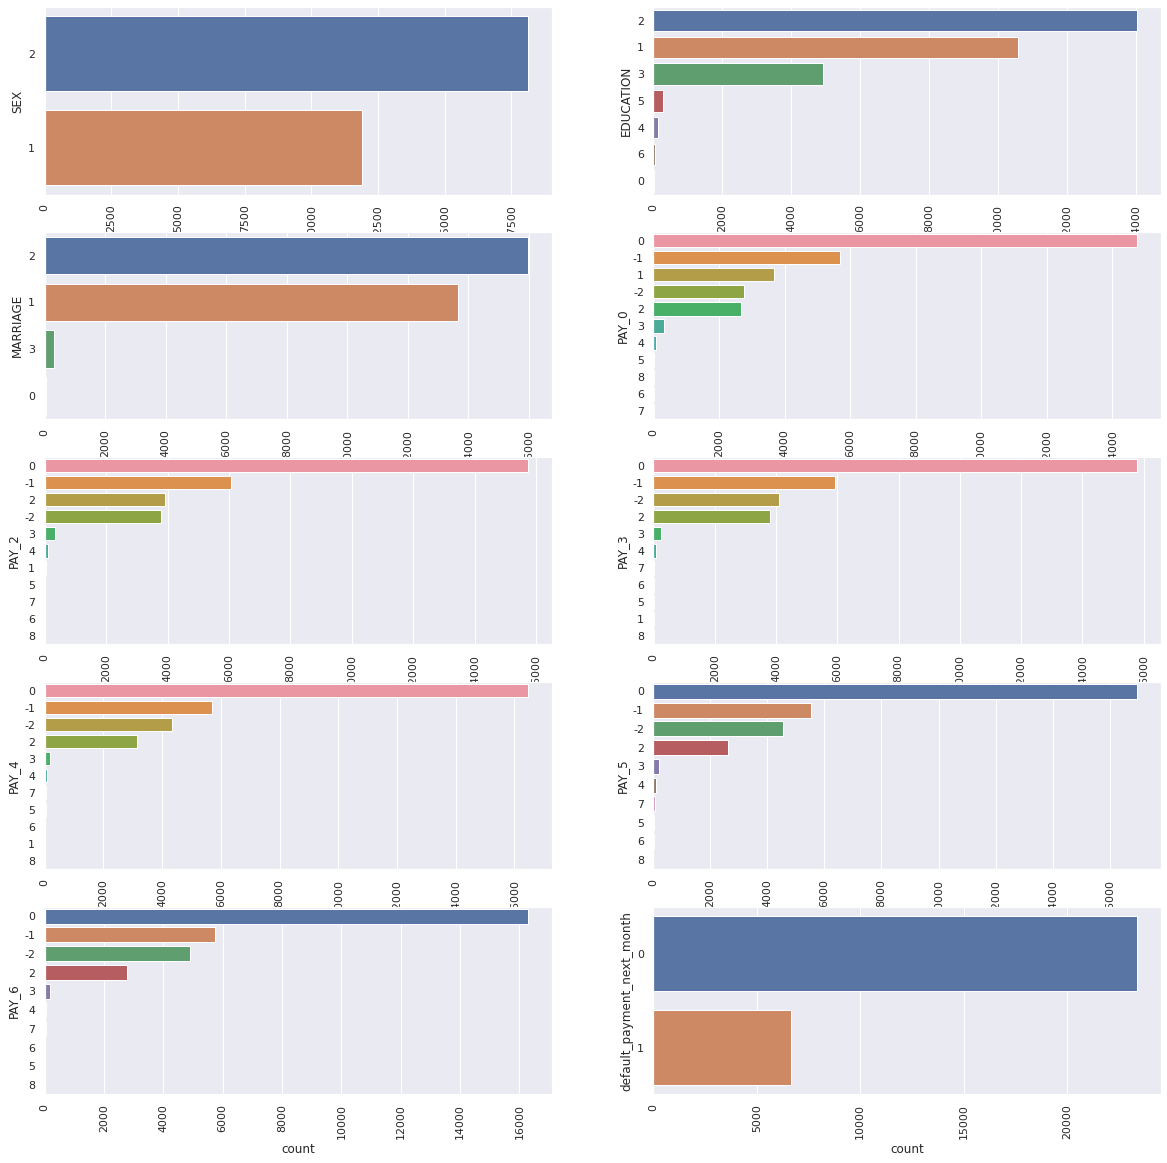

In [31]:
#--------------------------------------------------
# GRÁFICOS DE BARRA
#--------------------------------------------------
# Esta función estara en funpymodeling como freq() o plot_freq()
# NOTA: antes de usar este script, saquen las variables que tienen mas de 100 categorias distintas
import matplotlib.pyplot as plt
import seaborn as sns

d_plot = df_defcredcard
fig, ax = plt.subplots(5, 2, figsize=(20, 20))
for variable, subplot in zip(cat_vars(d_plot), ax.flatten()):
    sns.countplot(y=d_plot[variable], ax=subplot, order = d_plot[variable].value_counts().index)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [26]:
#plt.figure(figsize = (15, 15))
#plt.subplot(3, 3, 1)
#sns.countplot(data=df_defcredcard, x='SEX')
#plt.subplot(3, 3, 2)
#sns.countplot(data=df_defcredcard, x='EDUCATION')
#plt.subplot(3, 3, 3)
#sns.countplot(data=df_defcredcard, x='MARRIAGE')
#plt.subplot(3, 3, 4)
#sns.countplot(data=df_defcredcard, x='PAY_0')
#plt.subplot(3, 3, 5)
#sns.countplot(data=df_defcredcard, x='PAY_2')
#plt.subplot(3, 3, 6)
#sns.countplot(data=df_defcredcard, x='PAY_3')
#plt.subplot(3, 3, 7)
#sns.countplot(data=df_defcredcard, x='PAY_4')
#plt.subplot(3, 3, 8)
#sns.countplot(data=df_defcredcard, x='PAY_5')
#plt.subplot(3, 3, 9)
#sns.countplot(data=df_defcredcard, x='PAY_6')
#plt.tight_layout()
#plt.show()

Comentario:
- La variable objetivo default_payment_next_month no tiene una proporción balanceada de sus clases:

0 : 77.88 %

1 : 22.12 %

#### Análisis de Variables Numéricas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0c818dbe0>,
      dtype=object)

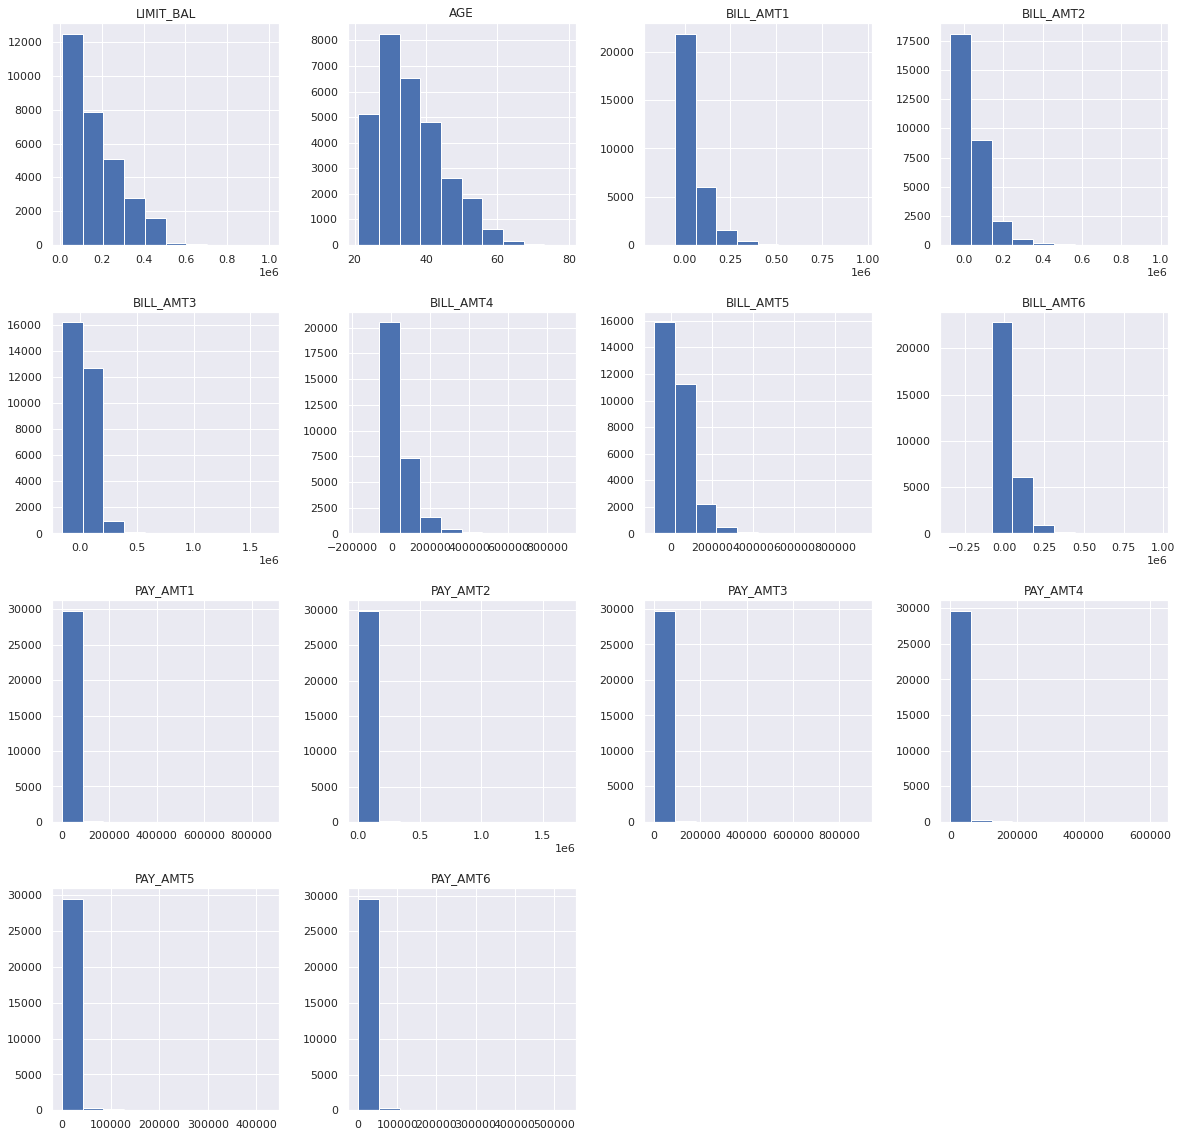

In [28]:
#----------------------------------------------
# HISTOGRAMAS
#----------------------------------------------
df_defcredcard.hist(figsize = (20,20))

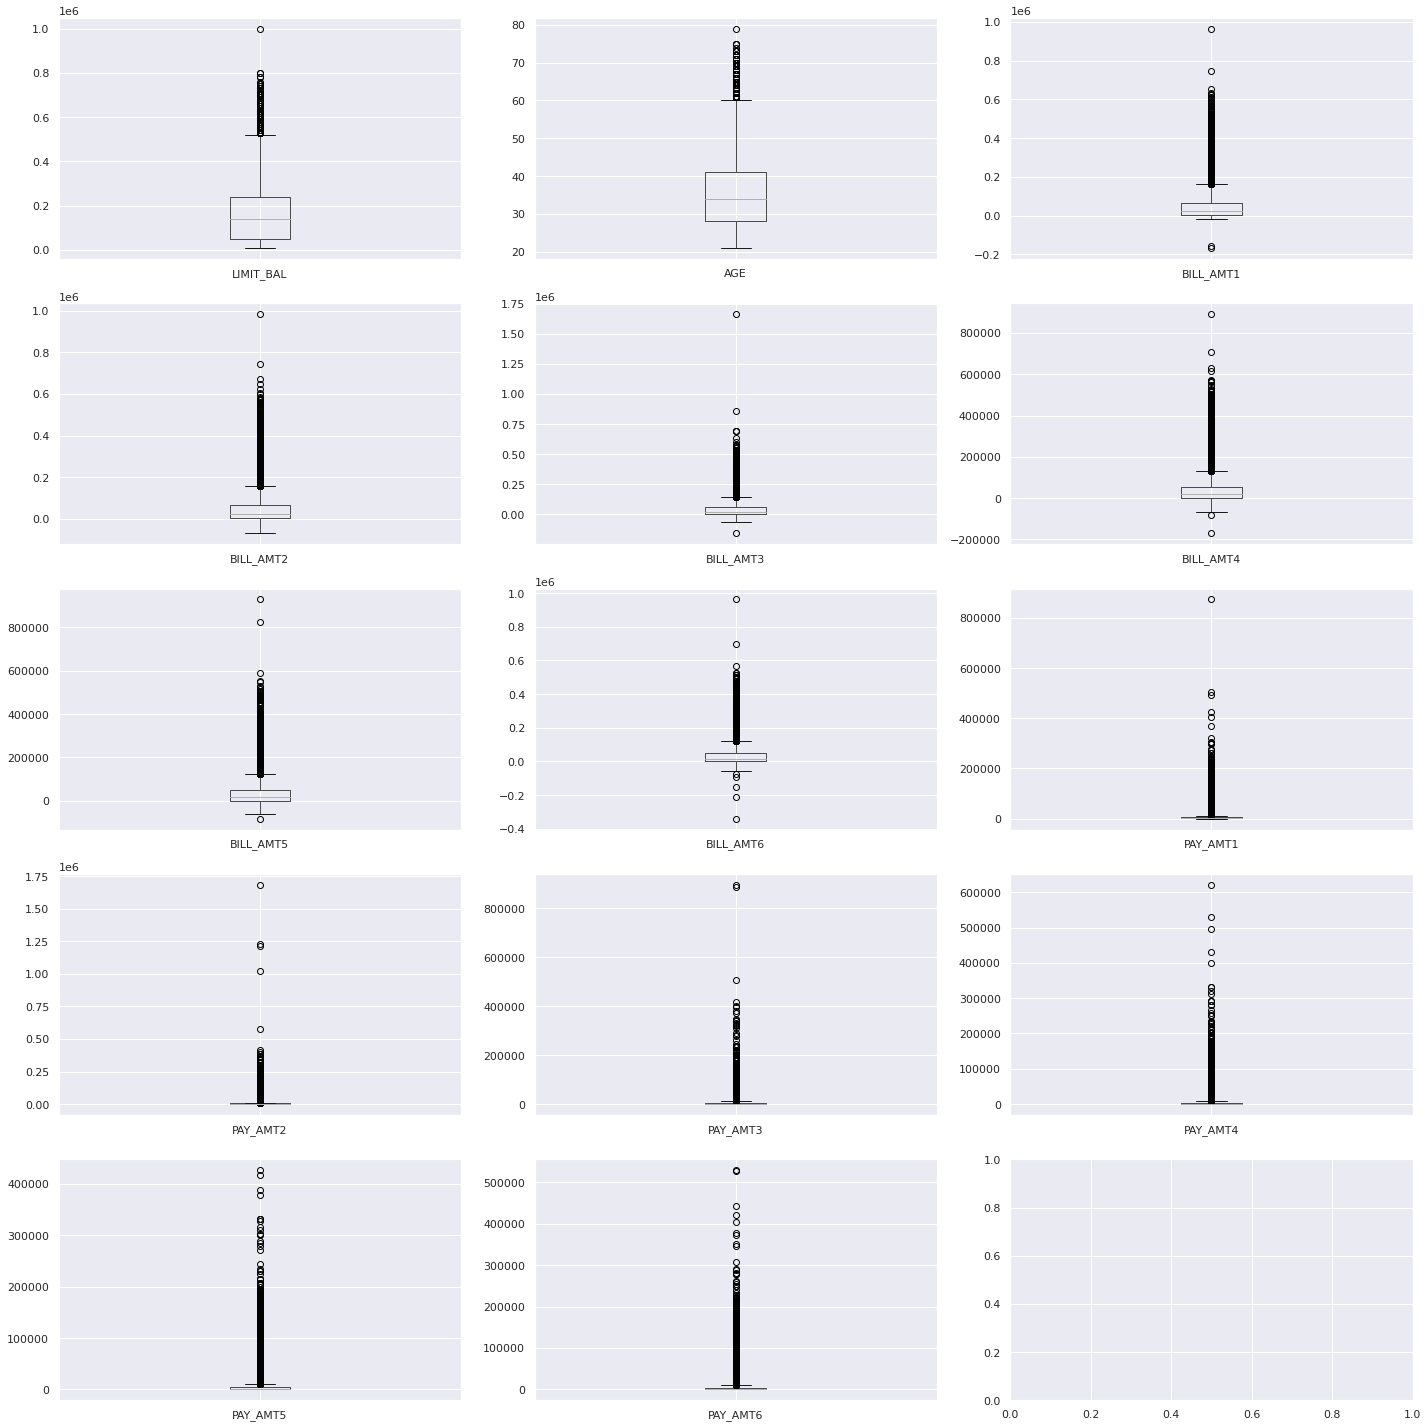

In [ ]:
#---------------------------------------------
# DIAGRAMAS DE CAJA
#---------------------------------------------
#df.boxplot(figsize=(20,10))

# create figure and axes
fig, axes = plt.subplots(5,3, figsize=(20, 20))

for i, el in enumerate(list(df_defcredcard.select_dtypes(exclude='object').columns.values)):
    a = df_defcredcard.boxplot(el, ax=axes.flatten()[i])

plt.tight_layout() 
plt.show()

In [34]:
#sns.pairplot(df_defcredcard, hue="default_payment_next_month", height=5, diag_kind="hist")

### ***Análisis Bivariado***

In [35]:
#from funpymodeling.exploratory import cat_vars, num_vars
print("Variables Categóricas: ", cat_vars(df_defcredcard))

Variables Categóricas:  Index(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'default_payment_next_month'],
      dtype='object')


#### Análisis de Var. Categórica vs Categórica

In [45]:
#---------------------------------------------------------------
# TABLAS DE CONTINGENCIA BIVARIADA
#---------------------------------------------------------------

#...............................................................
# Análisis: INCUMPLIMIENTO DE PAGO vs GÉNERO
#...............................................................
# Porcentages totales (suma de celdas 100%)
#pd.crosstab(df_defcredcard['SEX'], df_defcredcard['default_payment_next_month'], margins=True, normalize=True)

#df_target_vs_sex = df_defcredcard.groupby(['SEX',target])[target].count().unstack()
#df_target_vs_sex['percentage'] = round((df_target_vs_sex[1]/(df_target_vs_sex[0]+df_target_vs_sex[1]))*100,2)
#df_target_vs_sex

# Cantidades Totales (suma de celdas 100%) 
#pd.crosstab(df_defcredcard['SEX'], df_defcredcard['default_payment_next_month'], margins=True)

# Porcentages por registro (útil para selección de variables)
# pd.crosstab(df_defcredcard['SEX'], df_defcredcard['default_payment_next_month'], normalize='index', margins=True)

# Cantidades por registro 
pd.crosstab(df_defcredcard['SEX'], df_defcredcard['default_payment_next_month'], margins='index')

default_payment_next_month,0,1,All
SEX,,,
1,9015,2873,11888
2,14349,3763,18112
All,23364,6636,30000


In [46]:
#...............................................................
# Análisis: INCUMPLIMIENTO DE PAGO vs EDUCACIÓN
#...............................................................
# Porcentages totales (suma de celdas 100%)
#pd.crosstab(df_defcredcard['EDUCATION'], df_defcredcard['default_payment_next_month'], margins=True, normalize=True)

#df_target_vs_educ = df_defcredcard.groupby(['EDUCATION',target])[target].count().unstack()
#df_target_vs_educ['percentage'] = round((df_target_vs_educ[1]/(df_target_vs_educ[0]+df_target_vs_educ[1]))*100,2)
#df_target_vs_educ

# Cantidades Totales (suma de celdas 100%) 
#pd.crosstab(df_defcredcard['EDUCATION'], df_defcredcard['default_payment_next_month'], margins=True)

# Porcentages por registro (útil para selección de variables)
# pd.crosstab(df_defcredcard['EDUCATION'], df_defcredcard['default_payment_next_month'], normalize='index', margins=True)

# Cantidades por registro 
pd.crosstab(df_defcredcard['EDUCATION'], df_defcredcard['default_payment_next_month'], margins='index')

default_payment_next_month,0,1,All
EDUCATION,,,
0,14,0,14
1,8549,2036,10585
2,10700,3330,14030
3,3680,1237,4917
4,116,7,123
5,262,18,280
6,43,8,51
All,23364,6636,30000


In [47]:
#...............................................................
# Análisis: INCUMPLIMIENTO DE PAGO vs ESTADO CIVIL
#...............................................................
# Porcentages totales (suma de celdas 100%)
#pd.crosstab(df_defcredcard['MARRIAGE'], df_defcredcard['default_payment_next_month'], margins=True, normalize=True)

#df_target_vs_marriage = df_defcredcard.groupby(['MARRIAGE',target])[target].count().unstack()
#df_target_vs_marriage['percentage'] = round((df_target_vs_marriage[1]/(df_target_vs_marriage[0]+df_target_vs_marriage[1]))*100,2)
#df_target_vs_marriage

# Cantidades Totales (suma de celdas 100%) 
#pd.crosstab(df_defcredcard['MARRIAGE'], df_defcredcard['default_payment_next_month'], margins=True)

# Porcentages por registro (útil para selección de variables)
# pd.crosstab(df_defcredcard['MARRIAGE'], df_defcredcard['default_payment_next_month'], normalize='index', margins=True)

# Cantidades por registro 
pd.crosstab(df_defcredcard['MARRIAGE'], df_defcredcard['default_payment_next_month'], margins='index')

default_payment_next_month,0,1,All
MARRIAGE,,,
0,49,5,54
1,10453,3206,13659
2,12623,3341,15964
3,239,84,323
All,23364,6636,30000


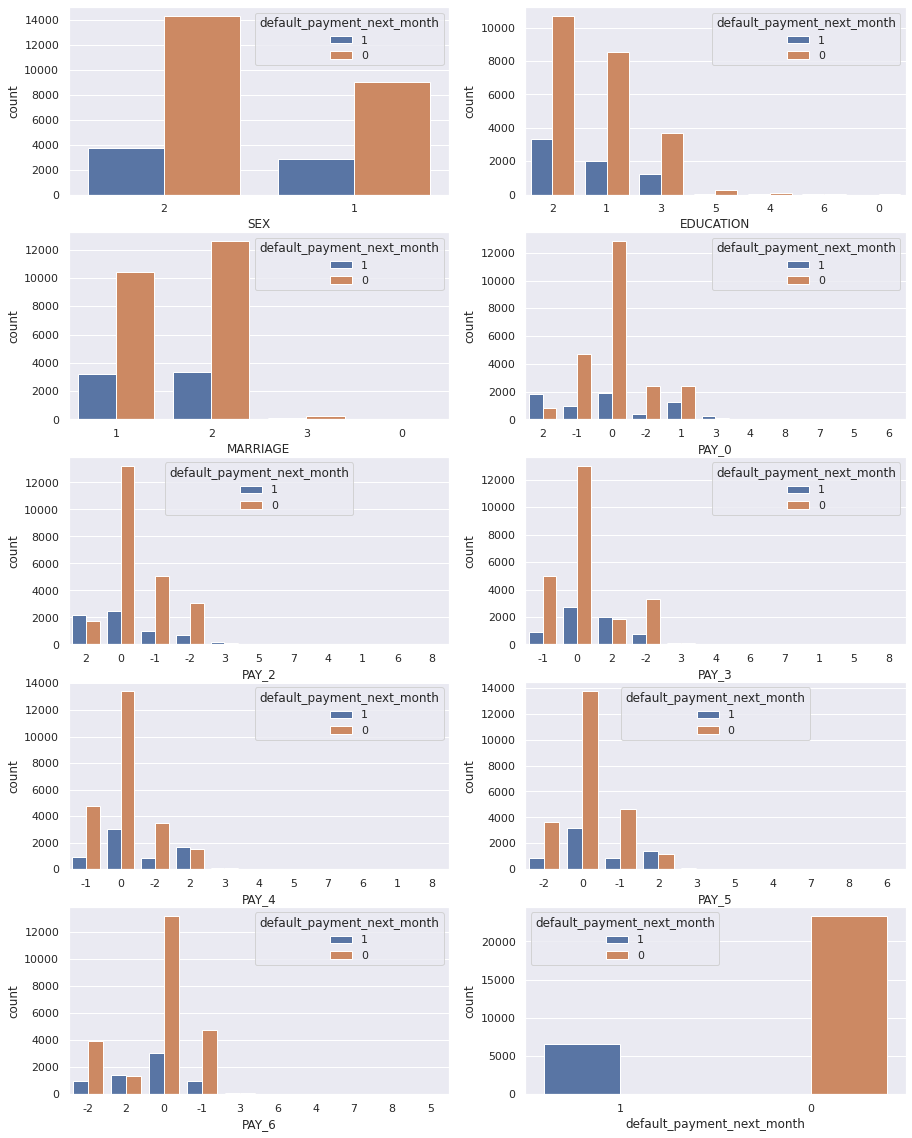

In [50]:
#---------------------------------------------------------------
# DIAGRAMAS DE BARRA BIVARIADO
#---------------------------------------------------------------

fig,axes = plt.subplots(5,2,figsize=(15,20))
for idx, cat_col in enumerate(cat_vars(df_defcredcard)):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df_defcredcard,hue='default_payment_next_month',ax=axes[row,col])

#g = sns.catplot(x="AGE", col="default_payment_next_month", data = df_defcredcard, kind="count")

Comentario: 
- Los hombres tienen una mayor probabilidad de incumplir que las mujeres, ya que ~ 24% de los hombres incumplen en comparación con ~ 20% de las mujeres. Además, según los datos, un mayor número de mujeres han incumplido (3763) que de hombres (2873) en los meses anteriores.
- Es visible que una mayor cantidad de educación tiende a reducir la probabilidad de incumplimiento. Esto tiene sentido porque una educación más baja puede significar un salario y un límite más bajos.
- Los clientes casados ​​tienen una mayor probabilidad de incumplimiento que los clientes solteros


#### Análisis de Var. Numérica vs Categórica

In [ ]:
#df_defcredcard.groupby('MARRIAGE')['AGE'].mean().sort_values(ascending=False)
#df_defcredcard.groupby('MARRIAGE')['AGE'].describe()
#df_defcredcard.groupby('default_payment_next_month').mean()

In [ ]:
#sns.boxplot(y = 'AGE', x = 'MARRIAGE', data = df_defcredcard)
#pd.DataFrame(df_defcredcard.groupby('Purpose')['AGE'].median().sort_values(ascending=True))

#grouped = df_defcredcard.loc[:,['AGE', 'MARRIAGE']].groupby(['MARRIAGE']).median().sort_values(by='AGE')
#grouped['MARRIAGE'] = grouped.index
#grouped.head()

#fig, ax = plt.subplots(figsize=(8,6))
#bp = sns.boxplot(y = 'AGE', x = 'MARRIAGE', data = df_defcredcard, order = grouped.index)
#bp.set_xticklabels(bp.get_xmajorticklabels(), fontsize = 10, rotation=45)
#plt.show()

In [ ]:
#sns.violinplot(y='AGE', x='MARRIAGE', data = df_defcredcard)

#### Análisis de Var. Numérica vs Numérica

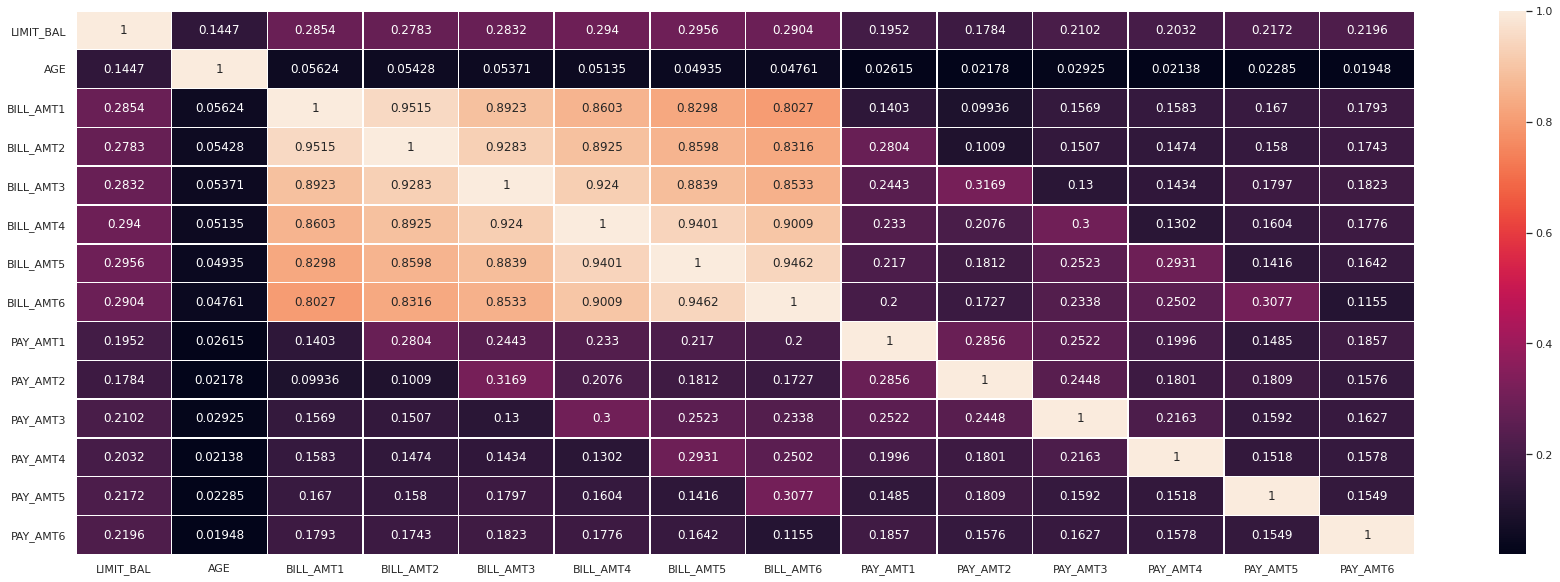

In [51]:
#-------------------------------------
# MATRIZ DE CORRELACIÓN
#-------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (30,10)) # tamaño de la imagen
corr = df_defcredcard.iloc[:,0:].corr()

sns.heatmap(corr, annot=True, fmt='.4g',linewidths=0.5,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Comentario:

- Ninguna de las variables predictora tiene una fuerte correlación con la variable objetivo. 
- La variable 'PAY_6' tienen una pequeña cantidad de correlación positiva con la variable objetivo y una correlación más fuerte entre las variables de historial de pago. Entonces, si ha incumplido o no en los meses anteriores, podría decidir la probabilidad de incumplimiento en el próximo mes. 
- Las variables de monto de estado de cuenta tienen una fuerte correlación positiva entre ellas. Esto también tiene sentido ya que los patrones de gasto de los clientes tienden a permanecer constantes y las organizaciones de comercio electrónico se aprovechan de esto. 
- La correlación negativa más fuerte se da entre 'AGE' y 'MARRIAGE', que se espera ya que los clientes más jóvenes tienden a ser solteros y los mayores tienden a estar casados.

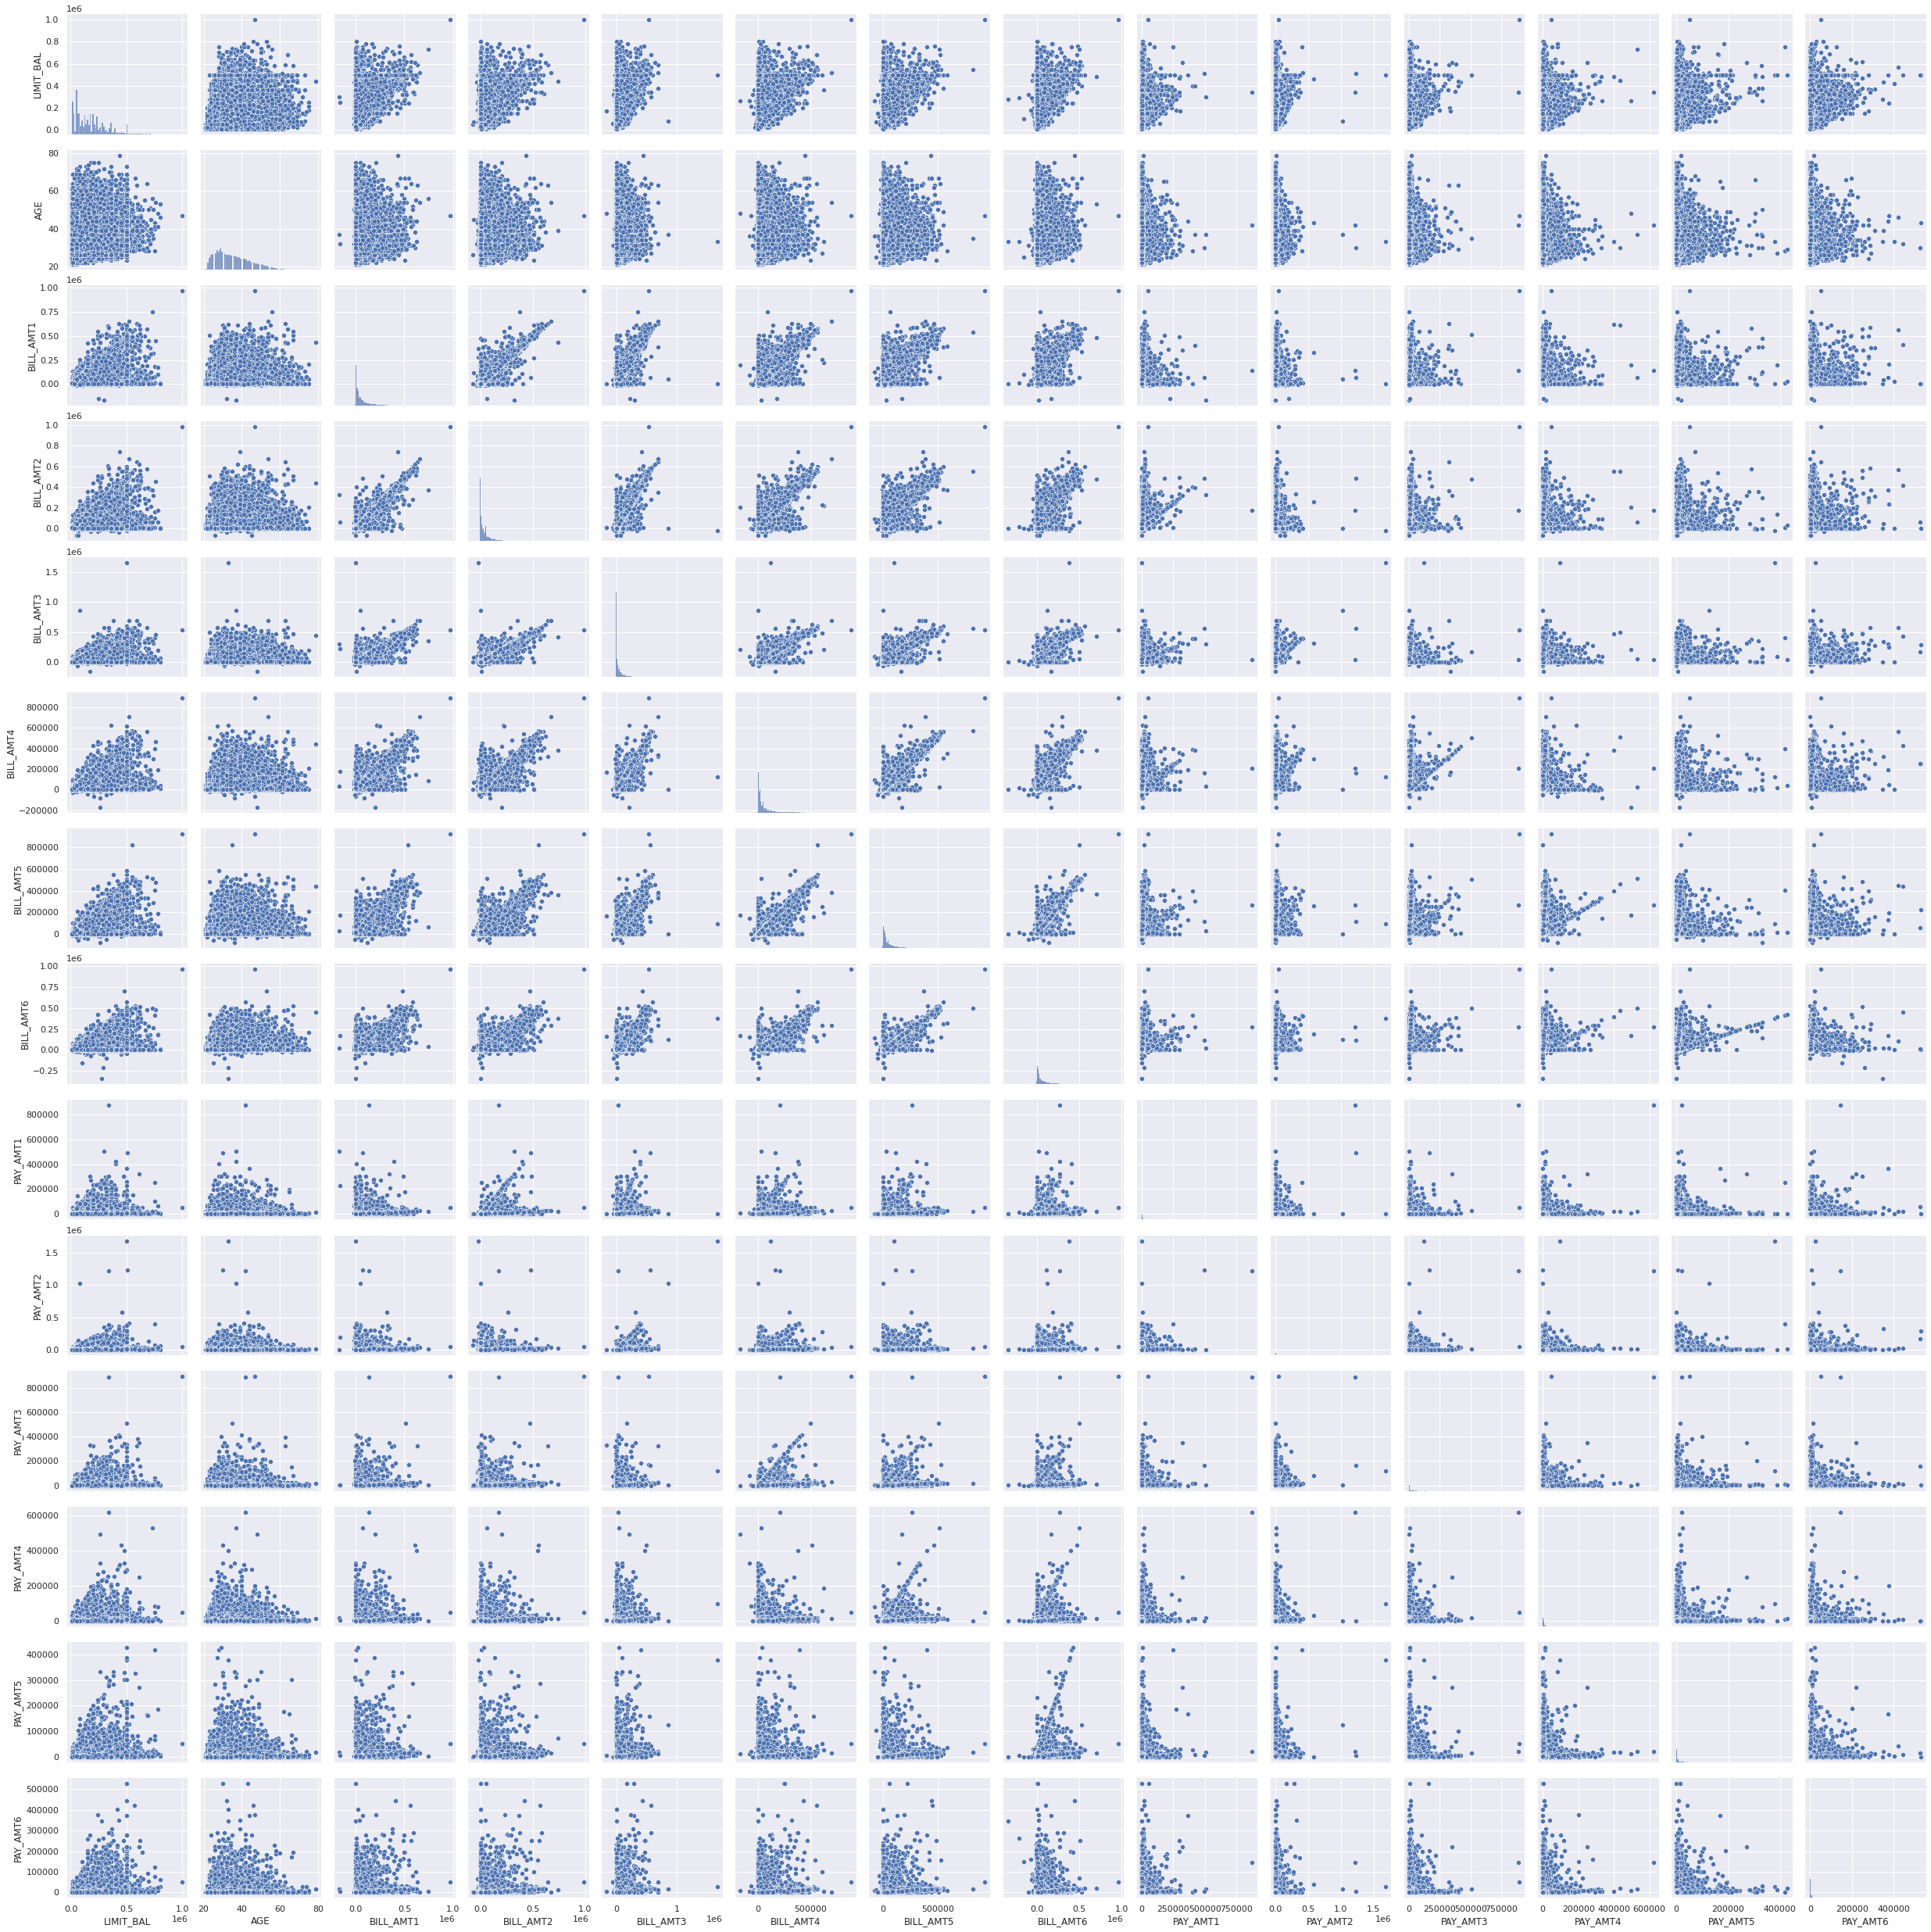

In [52]:
#-----------------------------------------------
# DIAGRAMA SCATTER PLOT
#-----------------------------------------------
sns.pairplot(df_defcredcard)

###############################################################################
# **3. PREPARACIÓN DE LOS DATOS**
###############################################################################